In [24]:
#Load packages
library(readr)
library(dplyr)

df_abort <- read_csv("final_abortion_1.csv")
df_sm <- read_csv("final_single_mothers.csv")

head(df_sm)
head(df_abort)

Parsed with column specification:
cols(
  .default = col_double(),
  states = col_character(),
  `effective date` = col_character(),
  `valid through date` = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  states = col_character(),
  percentage_single_mothers = col_double()
)


states,percentage_single_mothers
<chr>,<dbl>
Louisiana,11.67
Mississippi,11.30
New Mexico,9.69
North Carolina,9.53
Georgia,9.51
South Carolina,8.94


states,effective date,valid through date,ban_type,ban_time,prohibit_when_12 weeks postfertilization (14 weeks lmp),prohibit_when_13 weeks postfertilization (15 weeks lmp),prohibit_when_18 weeks postfertilization (20 weeks lmp),prohibit_when20 weeks postfertilization (22 weeks lmp),prohibit_when_22 weeks postfertilization (24 weeks lmp),⋯,methods_procedpartial-birth abortions,methods_proceddismemberment abortions,methods_proced_saline method abortions,methods_exclife endangerment,methods_excserious health risk,methods_exc_fetal anomaly,methods_exc_no exceptions,limited_law,limited_court,limited_ag
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,10/26/2017,12/1/2018,1,1,0,0,0,1,0,⋯,1,1,0,1,1,0,0,1,1,0
Alaska,7/19/2017,12/1/2018,1,0,3,3,3,3,3,⋯,1,0,0,0,0,0,1,0,0,0
Arizona,8/9/2017,12/1/2018,1,1,0,0,1,0,0,⋯,1,0,0,1,0,0,0,1,1,0
Arkansas,1/1/2018,12/1/2018,1,1,1,0,0,0,0,⋯,1,1,0,1,0,0,0,1,1,0
California,1/1/2014,12/1/2018,1,1,0,0,0,0,0,⋯,3,3,3,3,3,3,3,0,0,0
Colorado,12/1/2018,12/1/2018,0,0,3,3,3,3,3,⋯,3,3,3,3,3,3,3,0,0,0


In [18]:
states <- df_sm$"states"
head(states)

[1] "Louisiana"      "Mississippi"    "New Mexico"     "North Carolina"
[5] "Georgia"        "South Carolina"

In [19]:
df_joined <- df_abort %>% right_join(df_sm, by=c("states"))

In [20]:
head(df_joined)

states,effective date,valid through date,ban_type,ban_time,prohibit_when_12 weeks postfertilization (14 weeks lmp),prohibit_when_13 weeks postfertilization (15 weeks lmp),prohibit_when_18 weeks postfertilization (20 weeks lmp),prohibit_when20 weeks postfertilization (22 weeks lmp),prohibit_when_22 weeks postfertilization (24 weeks lmp),⋯,methods_proceddismemberment abortions,methods_proced_saline method abortions,methods_exclife endangerment,methods_excserious health risk,methods_exc_fetal anomaly,methods_exc_no exceptions,limited_law,limited_court,limited_ag,percentage_single_mothers
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Louisiana,5/23/2018,12/1/2018,1,1,0,0,0,1,0,⋯,1,0,1,1,0,0,1,1,0,11.67
Mississippi,11/20/2018,12/1/2018,1,1,0,1,0,0,0,⋯,1,0,1,1,0,0,1,1,0,11.30
New Mexico,5/17/2000,12/1/2018,1,0,3,3,3,3,3,⋯,0,0,1,1,0,0,0,0,0,9.69
North Carolina,10/1/2015,12/1/2018,1,1,0,0,0,1,0,⋯,3,3,3,3,3,3,0,0,0,9.53
Georgia,5/9/2017,12/1/2018,1,1,0,0,0,1,0,⋯,0,0,1,0,0,0,0,0,0,9.51
South Carolina,5/25/2016,12/1/2018,1,1,0,0,0,1,0,⋯,0,0,1,1,0,0,0,0,0,8.94


In [23]:
df_final <- unique(df_joined[, c("states", "ban_type", "ban_time","ban_reason", "ban_method", "percentage_single_mothers")])
head(df_final)

states,ban_type,ban_time,ban_reason,ban_method,percentage_single_mothers
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Louisiana,1,1,1,1,11.67
Mississippi,1,1,0,1,11.30
New Mexico,1,0,0,1,9.69
North Carolina,1,1,1,0,9.53
Georgia,1,1,0,1,9.51
South Carolina,1,1,0,1,8.94


In [27]:
#Creating a column that adds all of the individual legislation into one metric for the abortion ban scale 
df_final$ban_scale <- df_final$ban_type +  df_final$ban_time +  df_final$ban_reason + df_final$ban_method
head(df_final)

states,ban_type,ban_time,ban_reason,ban_method,percentage_single_mothers,ban_scale
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Louisiana,1,1,1,1,11.67,4
Mississippi,1,1,0,1,11.30,3
New Mexico,1,0,0,1,9.69,2
North Carolina,1,1,1,0,9.53,3
Georgia,1,1,0,1,9.51,3
South Carolina,1,1,0,1,8.94,3


In [28]:
#Create a function for the abortion ban scale to add all of the individual legislation into one metric
sum_columns <- function(p, a, u, l){
    n <- length(p)
    res <- rep(0, n)
    
    for(i in 1:n){
        res[i] <- sum(p[i], a[i], u[i], l[i], na.rm = TRUE)
}
    return(res)
}

In [106]:
#Creating a new column and applying our function to it
df_final$ban_scale2 <- sum_columns(df_final$"ban_type", df_final$"ban_time", df_final$"ban_reason", df_final$"ban_method")
#head(df_final)
#summary(df_final)
df_final

states,ban_type,ban_time,ban_reason,ban_method,percentage_single_mothers,ban_scale,ban_scale2,new_ban_scale
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Louisiana,1,1,1,1,11.67,4,4,3
Mississippi,1,1,0,1,11.30,3,3,2
New Mexico,1,0,0,1,9.69,2,2,1
North Carolina,1,1,1,0,9.53,3,3,2
Georgia,1,1,0,1,9.51,3,3,2
South Carolina,1,1,0,1,8.94,3,3,2
Oklahoma,1,1,1,1,8.63,4,4,3
Rhode Island,1,1,0,1,8.28,3,3,2
Texas,1,1,0,1,8.25,3,3,2


In [78]:
#Now we are running a T-test that is probably the wrong test
t_test_mir <- t.test(df_final$percentage_single_mothers, df_final$ban_scale2)
t_test_mir


	Welch Two Sample t-test

data:  df_final$percentage_single_mothers and df_final$ban_scale2
t = 18.58, df = 100.24, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 4.237300 5.250392
sample estimates:
mean of x mean of y 
 7.263077  2.519231 


In [104]:
#Now we are reshaping our data in order to run the t-test aka subsetting, selecting, and reshaping

harsh <- df_final  %>%
    filter(ban_scale == "3")

weak <- df_final  %>%
    filter(ban_scale == "0")

In [105]:
#Now we are running a t-test
t_test_scale <- t.test(harsh$percentage_single_mothers, weak$percentage_single_mothers)
t_test_scale


	Welch Two Sample t-test

data:  harsh$percentage_single_mothers and weak$percentage_single_mothers
t = 2.1236, df = 24.911, p-value = 0.04381
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02595723 1.70499515
sample estimates:
mean of x mean of y 
 7.377143  6.511667 


In [107]:
#NEW
#Creating a column that adds all of the individual legislation into one metric for the abortion ban scale 
df_final$new_ban_scale <- df_final$ban_time + df_final$ban_method
head(df_final)

states,ban_type,ban_time,ban_reason,ban_method,percentage_single_mothers,ban_scale,ban_scale2,new_ban_scale
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Louisiana,1,1,1,1,11.67,4,4,2
Mississippi,1,1,0,1,11.30,3,3,2
New Mexico,1,0,0,1,9.69,2,2,1
North Carolina,1,1,1,0,9.53,3,3,1
Georgia,1,1,0,1,9.51,3,3,2
South Carolina,1,1,0,1,8.94,3,3,2


In [108]:
#NEW Now we doing a new filter
new_harsh <- df_final  %>%
    filter(new_ban_scale == "2")

new_weak <- df_final  %>%
    filter(new_ban_scale == "0")

In [109]:
#NEW Now we are running a t-test
new_t_test_scale <- t.test(new_harsh$percentage_single_mothers, new_weak$percentage_single_mothers)
new_t_test_scale


	Welch Two Sample t-test

data:  new_harsh$percentage_single_mothers and new_weak$percentage_single_mothers
t = 2.4186, df = 28.631, p-value = 0.02217
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1329571 1.5947440
sample estimates:
mean of x mean of y 
 7.375517  6.511667 


In [58]:
#INDIVIVDUAL TESTS
#This is type filter
type_y <- df_final  %>%
    filter(ban_type == "1")

type_n <- df_final  %>%
    filter(ban_type == "0")

In [64]:
#This is type test
t_test_type <- t.test(type_y$percentage_single_mothers, type_n$percentage_single_mothers)
t_test_type


	Welch Two Sample t-test

data:  type_y$percentage_single_mothers and type_n$percentage_single_mothers
t = 2.917, df = 21.662, p-value = 0.00807
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.244017 1.448205
sample estimates:
mean of x mean of y 
 7.357778  6.511667 


In [60]:
#This is time filter
time_y <- df_final  %>%
    filter(ban_time == "1")

time_n <- df_final  %>%
    filter(ban_time == "0")

In [65]:
#This is time test
t_test_time <- t.test(time_y$percentage_single_mothers, time_n$percentage_single_mothers)
t_test_time


	Welch Two Sample t-test

data:  time_y$percentage_single_mothers and time_n$percentage_single_mothers
t = 1.2218, df = 17.468, p-value = 0.238
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3690924  1.3896778
sample estimates:
mean of x mean of y 
 7.358293  6.848000 


In [67]:
#This is reason filter
reason_y <- df_final  %>%
    filter(ban_reason == "1")

reason_n <- df_final  %>%
    filter(ban_reason == "0")

In [68]:
#This is reason test
t_test_reason <- t.test(reason_y$percentage_single_mothers, reason_n$percentage_single_mothers)
t_test_reason


	Welch Two Sample t-test

data:  reason_y$percentage_single_mothers and reason_n$percentage_single_mothers
t = 1.4802, df = 16.16, p-value = 0.1581
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3171247  1.7885349
sample estimates:
mean of x mean of y 
 7.820833  7.085128 


In [70]:
#This is method filter
method_y <- df_final  %>%
    filter(ban_method == "1")

method_n <- df_final  %>%
    filter(ban_method == "0")

In [71]:
#This is reason test
t_test_method <- t.test(method_y$percentage_single_mothers, method_n$percentage_single_mothers)
t_test_method


	Welch Two Sample t-test

data:  method_y$percentage_single_mothers and method_n$percentage_single_mothers
t = 0.91276, df = 48.637, p-value = 0.3659
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3899389  1.0387268
sample estimates:
mean of x mean of y 
 7.372727  7.048333 


In [57]:
#Now we are trying a chi-squared test
chsq1 <- chisq.test( df_final$percentage_single_mothers, df_final$ban_method)
chsq1

Warning message in chisq.test(df_final$ban_method, df_final$percentage_single_mothers):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  df_final$ban_method and df_final$percentage_single_mothers
X-squared = 44.432, df = 44, p-value = 0.4534


In [ ]:
###IGNORE THIS 
#Now we are creating a function to run chi squared tests for each of the four ban methods
#create a function for the abortion ban scale to add all of the individual legislation into one metric
#add_ban <- function(col)
     #n <- length(col)
    #new <- rep(0, n)
    
   # for(i in 1:n)
      #new[i] <- df_final$ban_type[i] +  df_final$ban_time[i] +  df_final$ban_reason[i] + df_final$ban_


#df_final$ban_scale <- df

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

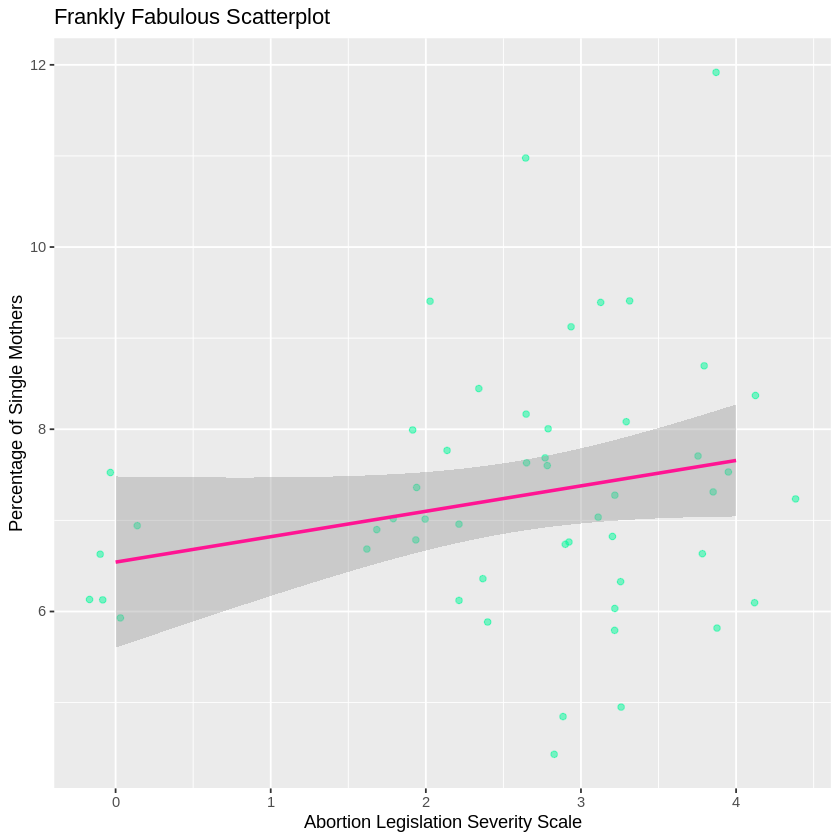

In [85]:
# Create a scatterplot of `num_arrests` and `homeless_arrests`
library(ggplot2)

paulplot <- ggplot(df_final, aes(x = ban_scale, y = percentage_single_mothers)) +
                 geom_jitter(width = 0.4, height = 0.4, alpha = 0.5, col = "mediumspringgreen", fill = "purple") + 
                    geom_smooth(method = "lm", colour = "deeppink")
paulplot + labs (title="Frankly Fabulous Scatterplot", 
                   x="Abortion Legislation Severity Scale", y="Percentage of Single Mothers")


#geom_smooth was extra.  I did that so I could get the line!

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

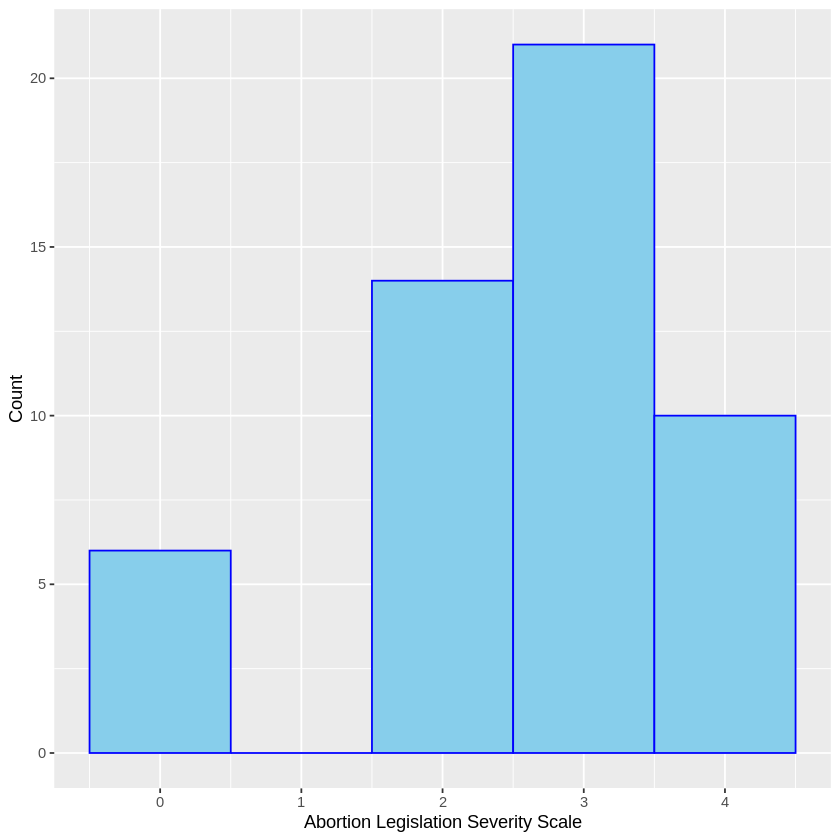

In [103]:
abortplot <- ggplot(df_final, aes(x = ban_scale)) + geom_histogram(binwidth =1, fill = "skyblue", col= "blue1") 
abortplot + labs(x="Abortion Legislation Severity Scale", y="Count")